In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

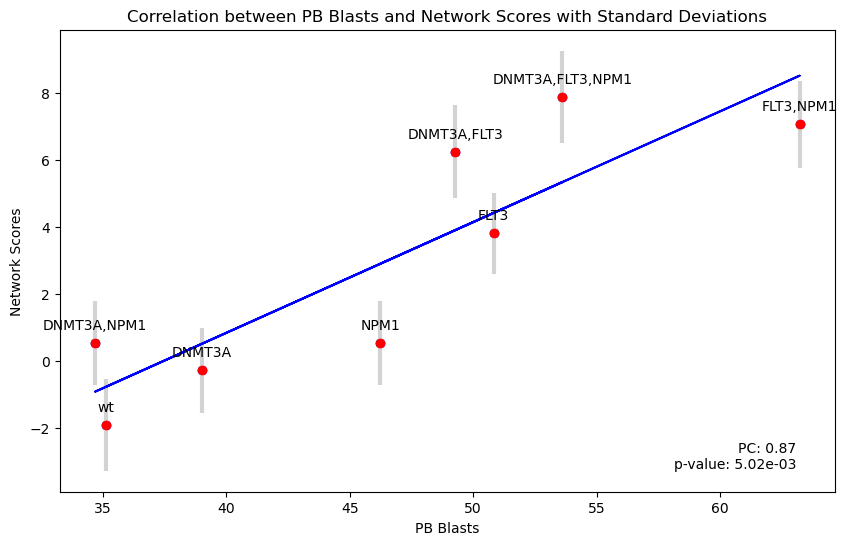

In [12]:
# Data
network_scores = {'NPM1': 0.55162, 'DNMT3A,FLT3': 6.249396, 'FLT3': 3.8182600000000004, 'FLT3,NPM1': 7.070572, 'DNMT3A,NPM1': 0.54938, 'DNMT3A,FLT3,NPM1': 7.88892, 'DNMT3A': -0.2661159999999999, 'wt': -1.895896}
std_devs = {'NPM1': 1.2555477559631096, 'DNMT3A,FLT3': 1.3871314166494826, 'FLT3': 1.2149516593050111, 'FLT3,NPM1': 1.2992051157719477, 'DNMT3A,NPM1': 1.2521322353361883, 'DNMT3A,FLT3,NPM1': 1.3754291157482452, 'DNMT3A': 1.2676706213902726, 'wt': 1.367977792486413}
pb_blasts = [46.22673462538803, 49.27945625727282, 50.82688689250733, 63.21957785888078, 34.68312478275982, 53.60903764886669, 39.00501216545012, 35.14249973553369]

# Extract data for plotting
labels = list(network_scores.keys())
scores = list(network_scores.values())
errors = list(std_devs.values())

# Calculate Pearson Correlation and p-value
pc, p_value = pearsonr(pb_blasts, scores)
        
# Create scatter plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
sc = ax.scatter(pb_blasts, scores, color='blue')

# Add error bars
ax.errorbar(pb_blasts, scores, yerr=errors, fmt='o', color='red', ecolor='lightgray', elinewidth=3, capsize=0)

# Add correlation line
m, b = np.polyfit(pb_blasts, scores, 1)
ax.plot(pb_blasts, m * np.array(pb_blasts) + b, color='blue')

# Annotate Pearson Correlation and p-value
ax.text(0.95, 0.05, f'PC: {pc:.2f}\np-value: {p_value:.2e}',
        transform=ax.transAxes, horizontalalignment='right')
                
# Add titles and labels
ax.set_title('Correlation between PB Blasts and Network Scores with Standard Deviations')
ax.set_xlabel('PB Blasts')
ax.set_ylabel('Network Scores')

# Annotate each point with the corresponding label
for i, label in enumerate(labels):
    ax.annotate(label, (pb_blasts[i], scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
